In [82]:
import pandas as pd
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv("jre.csv")

In [169]:
df = df.drop(columns=["Unnamed: 0"])
df = df[~df["pod_num"].str.contains("MMA")]

In [170]:
df["guest_desc_short"] = df["guest_desc"].apply(lambda s: s.split('.')[0])

In [171]:
df.head(5)

,pod_num,guest,guest_desc,transcript,date,guest_desc_short
0,1104,Boyan Slat,"Boyan Slat is an inventor, entrepreneur and fo...","Ladies and gentlemen, welcome to the show. Ho...","April 16, 2018","Boyan Slat is an inventor, entrepreneur and fo..."
1,1105,Michael Hunter,Michael Hunter is the chef and owner of Antler...,"Hey everybody, how the fuck are ya? Huh? Huh?...","April 17, 2018",Michael Hunter is the chef and owner of Antler...
2,1106,Colion Noir,"Colion Noir is a gun rights activist, lawyer, ...",hey ladies gentlemen how's the thing this epi...,"April 18, 2018","Colion Noir is a gun rights activist, lawyer, ..."
3,1107,Sam Harris & Maajid Nawaz,Sam Harris is a neuroscientist and author of t...,hey you friends what's going on this episode ...,"April 18, 2018",Sam Harris is a neuroscientist and author of t...
4,1108,Peter Attia,Peter Attia is is the founder of Attia Medical...,late and gentlemen how's everyone doing I'm d...,"April 24, 2018",Peter Attia is is the founder of Attia Medical...


In [172]:
len(df)

277

## Cluster

In [173]:
def vectorize(df):
    extra_stops = ["available", "https"]
    en_stop_words = stopwords.words('english')
    stop_words = set(en_stop_words + extra_stops)

    vectorizer = TfidfVectorizer(stop_words=stop_words)
    
    all_docs = [s for s in df["guest_desc_short"]]
    X = vectorizer.fit_transform(all_docs)
    return X

In [174]:
def cluster_check(X):
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=200, n_init=10)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [175]:
def word_cloud(true_k):
    for k in range(true_k):
        s = df[df["guest_cluster"] == k]
        text = s['guest_desc'].str.cat(sep=' ')
        text = text.lower()
        text = ' '.join([word for word in text.split() if word not in stop_words])
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
        print('Cluster: {}'.format(k))
        print('Titles')
        guests = s['guest']         
        print(guests.to_string(index=False))
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

In [179]:
def cluster(k, X, df):
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)
    labels = model.labels_
    df["guest_cluster"] = labels
    word_cloud(true_k)

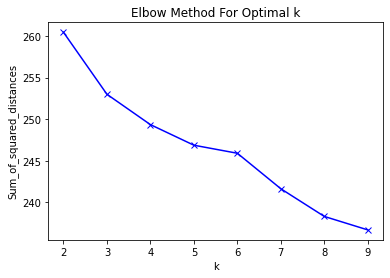

In [177]:
X = vectorize(df)
cluster_check(X)

Cluster: 0
Titles
                                  Boyan Slat
                              Michael Hunter
                                 Colion Noir
                   Sam Harris & Maajid Nawaz
                                 Peter Attia
                              Matthew Walker
                                 Zach Bitter
                                 Abby Martin
                               Cameron Hanes
                                 Matt Taibbi
                                  Mike Baker
                                Steven Tyler
                                 Tim Kennedy
                                Howard Bloom
                              Ben Greenfield
                              Michael Pollan
                              Donnie Vincent
                               Robert Schoch
                               Candace Owens
                                Jesse Itzler
                                  Adam Frank
                              Kyle Ki

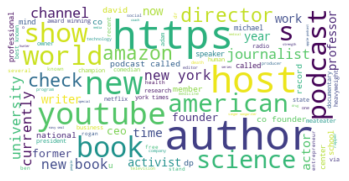

Cluster: 1
Titles
       Dr. Debra Soh
  Dr. Rhonda Patrick
    Dr. Ben Goertzel
     Dr. Andrew Weil
            Dr. Phil
  Dr. Rhonda Patrick
     Alan Levinovitz
 Dr. Bradley Garrett
       Dr. Debra Soh
       Paul Saladino


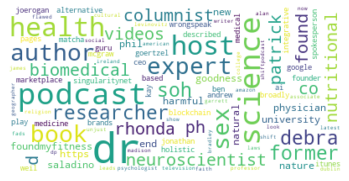

Cluster: 2
Titles
                        Brian Redban
                            Theo Von
                         Kevin Smith
                        Erik Griffin
                        Ryan Sickler
                            Tom Papa
                          Dave Rubin
                       Kyle Dunnigan
                     Duncan Trussell
                           Joey Diaz
                            Theo Von
                           Tony Rock
                    Candice Thompson
                       Doug Stanhope
                         Jeff Garlin
                      Andrew Santino
                      Felipe Esparza
                       Henry Rollins
                      Bert Kreischer
 Jerrod Carmichael & Jamar Neighbors
                            Tom Papa
                        Nikki Glaser
                          Nick Kroll
                      Andrew Santino
                       Roseanne Barr
                           Joey Diaz
                    

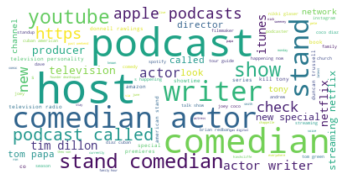

In [180]:
cluster(6, X, df)

## Search

In [161]:
# for index, row in df[df["transcript"].str.contains("Bulgaria", case=False)].iterrows():
#     print(row["guest"])
#     print(row["transcript"])

## Guests

In [6]:
guests = df.groupby("guest").size()
reocurring_guests = guests.where(guests > 1).dropna()
reocurring_guests.sort_values(ascending=False)

guest
Tom Papa              5.0
Tim Dillon            4.0
Mike Baker            4.0
Tony Hinchcliffe      3.0
Joey Diaz             3.0
Theo Von              3.0
Lex Fridman           3.0
Duncan Trussell       3.0
Donnell Rawlings      2.0
Dr. Debra Soh         2.0
Cameron Hanes         2.0
Colion Noir           2.0
Brian Redban          2.0
Bill Burr             2.0
Ben Greenfield        2.0
Andrew Schulz         2.0
Dr. Rhonda Patrick    2.0
Jordan Peterson       2.0
Gad Saad              2.0
Kyle Dunnigan         2.0
Mike Tyson            2.0
Nikki Glaser          2.0
Peter Schiff          2.0
Steven Rinella        2.0
Tim Kennedy           2.0
Tim Pool              2.0
Tom Green             2.0
Andrew Santino        2.0
dtype: float64

## Greetings

In [7]:
def get_type(s):
    types = ["comedian", "author", "athlete", "Professor", "entrepreneur", "journalist", "founder", "singer"]
    for t in types:
        if t.lower() in s.lower():
            return t.lower()
    return "other"
df["guest_type"] = df["guest_desc"].apply(get_type)

<AxesSubplot:xlabel='guest_type'>

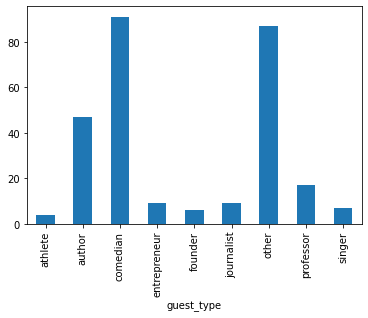

In [8]:
df.groupby("guest_type").size().plot.bar()

In [ ]:
df[df["guest_type"] == "other"]

In [10]:
def get_greeting(greeting):
    if "gentlemen" in greeting or "ladies" in greeting:
        return "ladies and gentlemen"
    elif "friends" in greeting:
        return "friends"
    elif "everybody" in greeting:
        return "everybody"
    elif "folks" in greeting:
        return "folks"
    else:
        return "other"

In [11]:
df["greeting"] = df["transcript"].str[:50]
df["greeting_name"] = df["greeting"].apply(get_greeting)

<AxesSubplot:xlabel='greeting_name'>

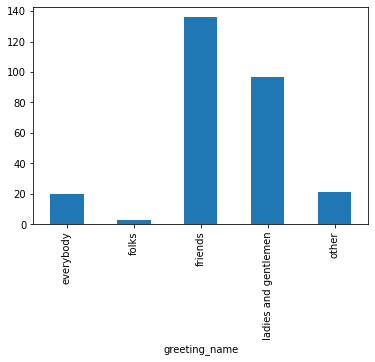

In [12]:
df.groupby("greeting_name").size().plot.bar()

In [13]:
df[df["greeting"].str.contains("motherfuking")]["greeting"]

7       this episode of the motherfuking podcast my c...
89      this episode of the motherfuking pop. Brought...
91      this episode of the motherfuking podcast is b...
102     it's the day before motherfuking Thanksgiving...
Name: greeting, dtype: object

In [ ]:
for greeting in df[df["greeting_name"] == "other"]["greeting"]:
    print(greeting)

### TODO
- always compare results across different data sets, with/without ads, spell check, etc
- create df run spell check to correct speech to text errors (done) (no results) 
- create df without ads in transcripts
- cluster: by guest_desc, tfidf (done)
- cluster: by guest_desc, word2vec
- sentiment analysis
- train model on rogan transcript only, predict next response, sentence
- number of offensive sentences, average prob per sentence?

## Profanity

In [17]:
from profanity_check import predict, predict_prob

ModuleNotFoundError: No module named 'profanity_check'

In [ ]:
df["profanity_pred"] = df["transcript"].apply(lambda s: [s]).apply(predict).apply(bool)
df["profanity_prob"] = df["transcript"].apply(lambda s: [s]).apply(predict_prob)

In [ ]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type"]].sort_values("profanity_prob")

In [ ]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type"]].sort_values("profanity_prob").tail(30)

In [ ]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type"]].sort_values("profanity_prob").head(20)

In [ ]:
df.groupby("guest_type").mean().plot.bar()

In [ ]:
df.groupby("guest_type").min().plot.bar()

In [ ]:
df.groupby("guest_type").boxplot(rot=45, fontsize=12, figsize=(8,10))

In [ ]:
df.groupby("profanity_pred").size().plot.bar()

In [ ]:
df[df["transcript"].str]

In [ ]:
def num_offensive_sentences(transcript):
    sentences = transcript.split(".")
    return len([s for s in sentences if predict([s]) == 1])

In [ ]:
df["num_offensive"] = df["transcript"].apply(num_offensive_sentences)

In [ ]:
df[["guest","profanity_prob", "profanity_pred", "guest_desc", "guest_type", "num_offensive"]].sort_values("profanity_prob")

### Resources
#### Profanity
- https://towardsdatascience.com/building-a-better-profanity-detection-library-with-scikit-learn-3638b2f2c4c2
- https://github.com/vzhou842/profanity-check

In [25]:
# import spacy
# import contextualSpellCheck
# did not yield changes

In [34]:
df.iloc[0]['transcript']

' Ladies and gentlemen, welcome to the show. How\'s everyone doing? I hope you\'re groovy. I\'m pretty fucking fired up for today, got a double header today. double header today and two very interesting people. But before that, let\'s get to our sponsors. This episode of the podcast is brought you by The Cash App. Now, The Cash App has copy here that I could read, but one one of the best things about The Cash App that I could bring up to you guys is that allows you to buy Bitcoin. The Cash App is a free app, you downloaded from the Google Play store, or from the App Store for iPhones. ... and you can send and receive money with friends at family. It\'s very easy way to pay people back or get p-p-p-paid. But it\'s also great way to buy and sell Bitcoin. A lot of people are interested in Bitcoin but don\'t know exactly where to start. "What do I do? I get an app? How do I buy it?" The best thing about Bitcoin is... like what is Bitcoin up to right now, Jamie? $7,000 bucks or something li